In [18]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from typing import Dict
import os
from utils.plotting import set_rc_params
from stable_baselines3.common.save_util import load_from_zip_file

In [19]:
# plt increase xticks and yticks font size\
plt.rcParams.update({'font.size': 15})
set_rc_params()
plt.rcParams['axes.grid'] = False

# Baselines

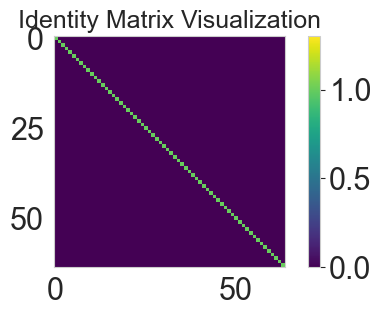

In [20]:
identity_lienar = nn.Linear(64, 64)
identity_lienar.weight.data = torch.eye(64
                                        )
identity_matrix = identity_lienar.weight.detach().numpy()
plt.imshow(identity_matrix, cmap='viridis', vmin=0, vmax=1.3)
plt.colorbar()
plt.title('Identity Matrix Visualization') 
plt.show()

# Ant Net2Deepoer Net2Wider Random

In [21]:
base_path = "smac3_output/###_growing_nn_new_seeded/net2wider_budget200/9/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 2, 512, 2)/2/0/model"
data, params, pytorch_variables = load_from_zip_file(base_path) 
# loda 

In [22]:
params["policy"].keys()

odict_keys(['features_extractor.extractors.chars.1.weight', 'features_extractor.extractors.chars.1.bias', 'features_extractor.downscaling.0.weight', 'features_extractor.downscaling.0.bias', 'features_extractor.linear_layers.sequential_container.linear_0.weight', 'features_extractor.linear_layers.sequential_container.linear_0.bias', 'features_extractor.linear_layers.sequential_container.linear_1.weight', 'features_extractor.linear_layers.sequential_container.linear_1.bias', 'pi_features_extractor.extractors.chars.1.weight', 'pi_features_extractor.extractors.chars.1.bias', 'pi_features_extractor.downscaling.0.weight', 'pi_features_extractor.downscaling.0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_0.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_1.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_1.bias', 'vf_features_extractor.extractor

In [23]:
# First layer weights
first_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_0.weight"]
first_layer_weights = np.abs(first_layer_weights.detach().numpy())
first_layer_weights = first_layer_weights[:50, :50]
# Second layer weights
second_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_1.weight"]
second_layer_weights = np.abs(second_layer_weights.detach().numpy())
second_layer_weights = second_layer_weights[:50, :50]

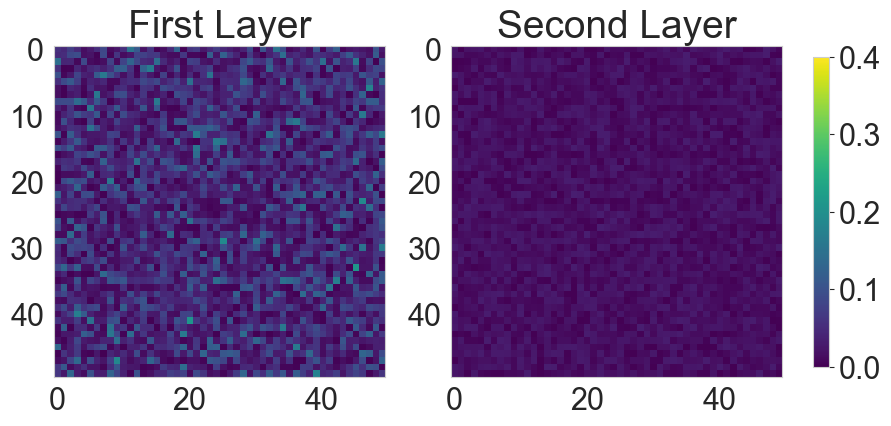

In [24]:
# Subplot with 3 figures horically
fig, axs = plt.subplots(1,2, figsize=(10, 5))
# First layer weights
axs[0].imshow(first_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[0].set_title('First Layer', fontsize=28)
# Second layer weights
im2 = axs[1].imshow(second_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[1].set_title('Second Layer', fontsize=28)
# Last layer weights
fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.savefig('plotting/network_weights/minihack/net2wider/random_2.pdf', bbox_inches='tight')

# Ant Net2WiderNet Width 1024 Monster

In [25]:
base_path = "smac3_output/###_growing_nn_new_seeded/net2wider_budget200/10/(64, 0.2, None, 0.003343880612533731, 0.95, 0.00023126111706719748, 0.5, 9, 2048, False, 0.5, 512, 2, 512, 2)/2/0/model.zip"
data, params, pytorch_variables = load_from_zip_file(base_path)

In [26]:
params["policy"].keys()

odict_keys(['features_extractor.extractors.chars.1.weight', 'features_extractor.extractors.chars.1.bias', 'features_extractor.downscaling.0.weight', 'features_extractor.downscaling.0.bias', 'features_extractor.linear_layers.sequential_container.linear_0.weight', 'features_extractor.linear_layers.sequential_container.linear_0.bias', 'features_extractor.linear_layers.sequential_container.linear_1.weight', 'features_extractor.linear_layers.sequential_container.linear_1.bias', 'pi_features_extractor.extractors.chars.1.weight', 'pi_features_extractor.extractors.chars.1.bias', 'pi_features_extractor.downscaling.0.weight', 'pi_features_extractor.downscaling.0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_0.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_1.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_1.bias', 'vf_features_extractor.extractor

In [27]:
first_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_0.weight"]
first_layer_weights = np.abs(first_layer_weights.detach().numpy())
first_layer_weights = first_layer_weights[:50, -50:]
# Second layer weights
second_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_1.weight"]
second_layer_weights = np.abs(second_layer_weights.detach().numpy())
second_layer_weights = second_layer_weights[:50, -50:]

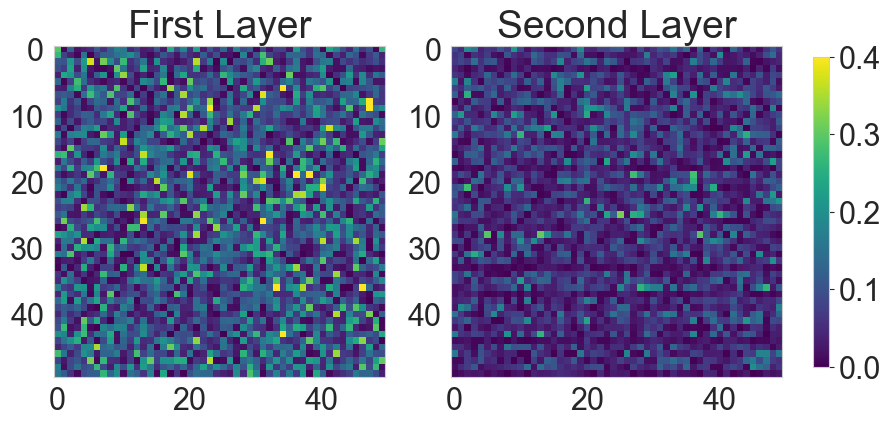

In [28]:
# Subplot with 3 figures horically
from utils.plotting import set_rc_params
set_rc_params()
plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(1,2, figsize=(10, 5))
# First layer weights
axs[0].imshow(first_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[0].set_title('First Layer', fontsize=28)
# Second layer weights
im2 = axs[1].imshow(second_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[1].set_title('Second Layer', fontsize=28,)
# Last layer weights
fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.savefig('plotting/network_weights/minihack/net2wider/monster_2.pdf', bbox_inches='tight')

# Ant Net2WiderNet Width 4096 Random

In [29]:
base_path = "smac3_output/###_growing_nn_new_seeded/net2wider_budget200/8/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 2, 512, 2)/4/0/model.zip"
data, params, pytorch_variables = load_from_zip_file(base_path)

In [30]:
first_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_0.weight"]
first_layer_weights = np.abs(first_layer_weights.detach().numpy())
first_layer_weights = first_layer_weights[:50, :50]
# Second layer weights
second_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_1.weight"]
second_layer_weights = np.abs(second_layer_weights.detach().numpy())
second_layer_weights = second_layer_weights[:50, :50]

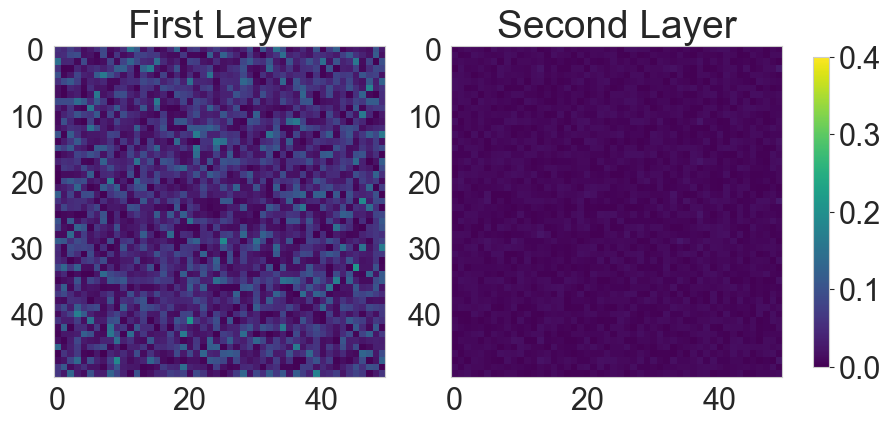

In [31]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
# First layer weights
axs[0].imshow(first_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[0].set_title('First Layer', fontsize=28)
# Second layer weights
im2 = axs[1].imshow(second_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[1].set_title('Second Layer', fontsize=28)
# Last layer weights
fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.savefig('plotting/network_weights/minihack/net2wider/random_4.pdf', bbox_inches='tight')

# Ant Net2WiderNet Width 4096 Monster

In [32]:
base_path = "smac3_output/###_growing_nn_new_seeded/net2wider_budget200/7/(128, 0.2, None, 0.006015388281913361, 0.95, 0.0002508161420145244, 0.5, 5, 2048, False, 0.5, 512, 2, 512, 2)/4/0/model"
data, params, pytorch_variables = load_from_zip_file(base_path)

In [33]:
first_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_0.weight"]
first_layer_weights = np.abs(first_layer_weights.detach().numpy())
first_layer_weights = first_layer_weights[:50, :50]
# Second layer weights
second_layer_weights = params["policy"]["vf_features_extractor.linear_layers.sequential_container.linear_1.weight"]
second_layer_weights = np.abs(second_layer_weights.detach().numpy())
second_layer_weights = second_layer_weights[:50, :50]

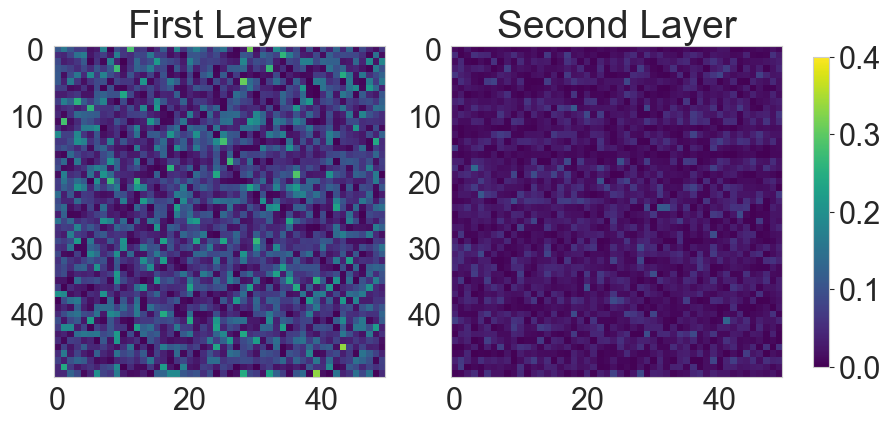

In [34]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
# First layer weights
axs[0].imshow(first_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[0].set_title('First Layer', fontsize=28)
# Second layer weights
im2 = axs[1].imshow(second_layer_weights, cmap='viridis', vmin=0, vmax=0.4)
axs[1].set_title('Second Layer', fontsize=28)
# Last layer weights
fig.colorbar(im2, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
plt.savefig('plotting/network_weights/minihack/net2wider/monster_4.pdf', bbox_inches='tight')